In [1]:
import pandas as pd

import plotly.express as px

In [2]:
csv_path = './data/corona.csv'

In [3]:
data_df = pd.read_csv(csv_path)

In [4]:
data_df.head()

,新No.,旧No.,確定日,年代,性別,居住地,周囲の患者の発生※,濃厚接触者\nの状況
0,１,１,1/15,30代,男,神奈川県,なし,38名特定\n健康観察終了
1,２,２,1/24,40代,男,中国\n（武漢市）,なし,32名特定\n健康観察終了
2,３,３,1/25,30代,女,中国\n（武漢市）,なし,７名特定\n健康観察終了
3,４,４,1/26,40代,男,中国\n（武漢市）,No.19,２名特定\n健康観察終了
4,５,５,1/28,40代,男,中国\n（武漢市）,なし,３名特定\n健康観察終了


In [20]:
date_count = data_df['確定日'].value_counts()

date_count_df = date_count.to_frame().reset_index()
date_count_df.columns = ['確定日', '確認感染者数']
date_count_df = date_count_df[date_count_df['確定日'] != '調査中']

In [22]:
date_count_df['確定日'] = pd.to_datetime(date_count_df['確定日'].apply(lambda x: '2020-'+x.replace('/', '-')))

In [23]:
date_count_df = date_count_df.sort_values(by='確定日')

In [24]:
fig = px.bar(date_count_df, x='確定日', y='確認感染者数', title='新規確認感染者数推移')

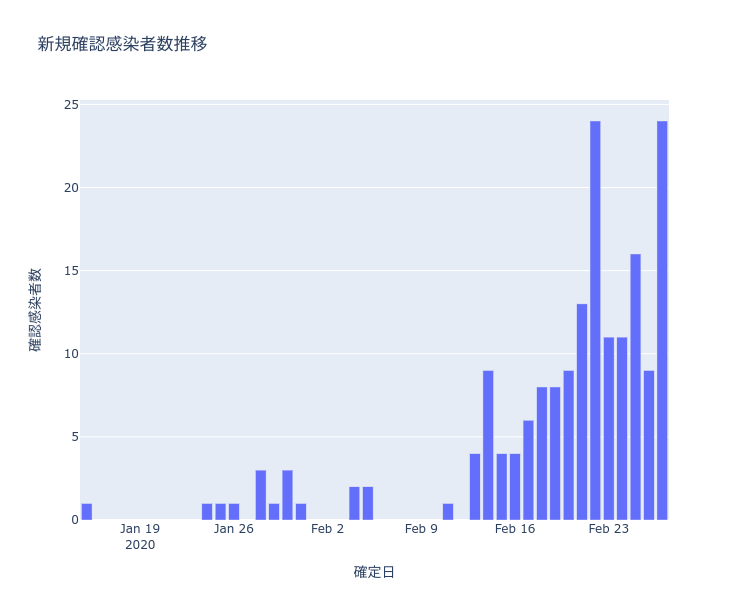

In [26]:
fig

In [27]:
fig.write_html('./data/corona_progress.html', config={'displaylogo': False})